**TITLE FOR CHOSEN DATASET:** <br><br>
*Suicide Death Rate by Age Group - 2011 to 2015* <br><br><br>
**SCOPE OF COLLECTED DATA:** <br><br>
*This indicator is defined as the crude death rate from suicide and intentional self-harm per 100, 000 people. The numbers are separated by both age group and place of origin. Figures should be interpreted with care as suicide registration methods vary between countries and over time. Moreover, the figures do not include deaths from events of undetermined intent (part of which should be considered as suicides) and attempted suicides which did not result in death.*



In [100]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [101]:
# Render the dataset into a pandas dataframe

data = pd.read_csv('Spectral_Dataset.csv')

data.drop(['country', 'year', 'sex', 'country-year','age', 'generation', data.columns[9]], axis=1, inplace=True)

data.head()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,21,312900,6.71,NaN,796
1,16,308000,5.19,NaN,796
2,14,289700,4.83,NaN,796
3,1,21800,4.59,NaN,796
4,9,274300,3.28,NaN,796


In [102]:
# Normalize the data and account for NaN values

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_imputed)

In [103]:
# Perform principal component analysis

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_normalized)

In [104]:
# Perform spectral clustering

spectral_cluster = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", assign_labels='kmeans')
labels = spectral_cluster.fit_predict(data_normalized)

c:\Users\DIETHAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [105]:
# Add the cluster labels to the original dataset

data['Cluster'] = labels

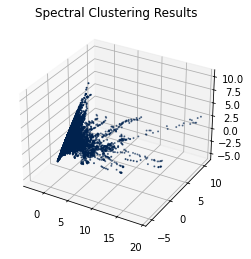

In [110]:
# Projecting the results on a 3D plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels, s=1, cmap='cividis')

plt.title('Spectral Clustering Results')
plt.show()

**CONCLUSION:** <br><br>
*From the 3D plot above, we can clearly see that the first cluster, colored in
dark blue, overwhelmingly takes a lot of space in the graph, to the point where
the other two clusters can only barely be seen behind the first. We can also see
that the first cluster is very compact around the 4-space in the x and y axes,
and then becomes increasingly sparse as it moves away from the initial grouping.*



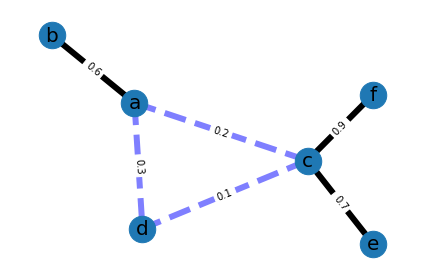

{'a': 0.19748104211845463,
 'b': 0.10067079156354411,
 'c': 0.6959564646836504,
 'd': 0.10946553425133645,
 'e': 0.41391096928695104,
 'f': 0.5321712462260806}

In [107]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# get the eigenvector centrality
nx.eigenvector_centrality_numpy(G, weight='weight')

Subreddit: r/battlecats
Title: Battle Cats - Adorable kitties go wild all over the world!
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='Chris_draws'), Redditor(name='AdmiralBrickell'), Redditor(name='DonutMaster56'), Redditor(name='RepoioZhukulemtho'), Redditor(name='Amnot_intherug')]


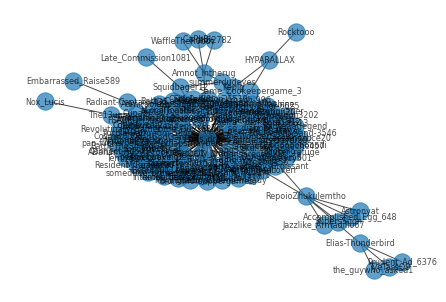

EIGENVECTOR CENTRALITY SCORES FOR THE TOP 5 USERS:

0.720475 - Chris_draws
0.086193 - AdmiralBrickell
0.079276 - DonutMaster56
0.074959 - RepoioZhukulemtho
0.073075 - Amnot_intherug

EIGENVECTOR CENTRALITY SCORES FOR THE BOTTOM 5 USERS:

0.000621 - the_guywho_asked1
0.000621 - TyeTassO9
0.000621 - Prudent_Ad_6376
0.001128 - Rocktooo
0.005873 - Embarrassed_Raise589


In [137]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(
    client_id = "P3y5wDWmFqEJ8A",
    client_secret = "sReJnw2xqq2ZYZBYgxae6pYp4H0",
    user_agent = "PL_SocialMedia",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: r/{subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        if isinstance(comment, praw.models.MoreComments):
            continue

        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

subreddit_name = "battlecats"
subreddit = reddit.subreddit(subreddit_name)
print_subreddit_info(subreddit)
post_id = get_top_post_id(subreddit)
social_network = create_social_network(post_id)
perform_social_network_analysis(social_network)
visualize_network(social_network)

eigenvector_centrality = nx.eigenvector_centrality_numpy(social_network)

print("EIGENVECTOR CENTRALITY SCORES FOR THE TOP 5 USERS:\n")
eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

for i, (redditor, centrality) in enumerate(eigenvector_centrality.items()):
    print(f"{centrality.round(6)} - {redditor}")

    if i == 4:
        break

print("\nEIGENVECTOR CENTRALITY SCORES FOR THE BOTTOM 5 USERS:\n")
eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=False))

for i, (redditor, centrality) in enumerate(eigenvector_centrality.items()):
    print(f"{centrality.round(6)} - {redditor}")

    if i == 4:
        break

**Hypothesis:** <br><br>
*Within many subreddits on Reddit, certain redditors, or nodes, with high eigenvector centrality play a crucial role in shaping and disseminating information. In this analysis, wherein the top post of r/battelcats is taken into account, it can be hypothesized that these central nodes are not necessarily the most active contributors but rather those who have indirect influence by being connected to other influential users, especially within the post in the scope. Additionally, we can possibly observe distinct clusters of users with high eigenvector centrality, representing different ideological factions within the political subreddits.* <br><br><br>
**Conclusion:** <br><br>
*As expected, the plot is mostly centered around specific nodes with high eigenvector centrality scores. These nodes are the users which can be said to have the most influence in the post. In this case, the redditor with the highest eigenvector centrality score is Chris_draws, who also happens to be the owner of the post. In the plot, he can be seen in the direct center, with many edges connecting to him spanning outwards.*

*Since it can be said that most of the interaction stems from him, while he also garners the most upvotes, it should be pretty clear why he has the highest eigenvector centrality score, heads and shoulders above even number 2.*

*Following this are the users which have the most interaction from the other users, which can be easily tracked from the amount of cumulative upvotes, or karma, they receive from other users, which can represent the positive interactions of said user with community.*

*As for the users in the bottom of the eigenvector centrality score, they can also be seen in the plot to be very far away from the center. We can clearly see this with the users "Rocktooo" and "Embarrassed_Raise589", who are at the very far ends of the graph and carry the lowest eigenvector centrality scores. This probably represents nodes that do not have much interaction with the post.*